In [1]:
%pip install -qU pypdf langchain-community langchain-text-splitters py-zerox


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
"""
## PDF RAG 
Document -> load -> split -> LLM 
"""

'\n## PDF RAG \nDocument -> load -> split -> LLM \n'

In [3]:
from langchain_community.document_loaders import PyPDFLoader 

pdf_file_path = "./documents/income_tax.pdf"
loader = PyPDFLoader(pdf_file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [4]:
pages

[Document(metadata={'producer': 'iText 2.1.7 by 1T3XT', 'creator': 'PyPDF', 'creationdate': '2025-01-10T10:55:01+09:00', 'moddate': '2025-01-10T10:55:01+09:00', 'source': './documents/income_tax.pdf', 'total_pages': 133, 'page': 0, 'page_label': '1'}, page_content='법제처                                                            1                                                       국가법령정보센터\n소득세법\n \n소득세법\n[시행 2025. 1. 1.] [법률 제20615호, 2024. 12. 31., 일부개정]\n기획재정부 (재산세제과(양도소득세)) 044-215-4312\n기획재정부 (소득세제과(근로소득)) 044-215-4216\n기획재정부 (금융세제과(이자소득, 배당소득)) 044-215-4233\n기획재정부 (소득세제과(사업소득, 기타소득)) 044-215-4217\n       제1장 총칙 <개정 2009. 12. 31.>\n \n제1조(목적) 이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 조세부\n담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다.\n[본조신설 2009. 12. 31.]\n[종전 제1조는 제2조로 이동 <2009. 12. 31.>]\n \n제1조의2(정의) ① 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2010. 12. 27., 2014. 12. 23., 2018. 12. 31.>\n1. “거주자”란 국내에 주소를 두거나 183일 이상의 거소(居所)를 둔 개인을 말한다.\n2. “비거주자”란 거주자가 아닌 개인을 말한다.\n3. “내국법인”이란 「법인세

In [5]:
pages[35]

Document(metadata={'producer': 'iText 2.1.7 by 1T3XT', 'creator': 'PyPDF', 'creationdate': '2025-01-10T10:55:01+09:00', 'moddate': '2025-01-10T10:55:01+09:00', 'source': './documents/income_tax.pdf', 'total_pages': 133, 'page': 35, 'page_label': '36'}, page_content='법제처                                                            36                                                       국가법령정보센터\n소득세법\n② 거주자의 퇴직소득에 대한 소득세는 다음 각 호의 순서에 따라 계산한 금액(이하 “퇴직소득 산출세액”이라 한다\n)으로 한다.<개정 2013. 1. 1., 2014. 12. 23.>\n1. 해당 과세기간의 퇴직소득과세표준에 제1항의 세율을 적용하여 계산한 금액\n2. 제1호의 금액을 12로 나눈 금액에 근속연수를 곱한 금액\n3. 삭제<2014. 12. 23.>\n[전문개정 2009. 12. 31.]\n \n           제2관 세액공제 <개정 2009. 12. 31.>\n \n제56조(배당세액공제) ① 거주자의 종합소득금액에 제17조제3항 각 호 외의 부분 단서가 적용되는 배당소득금액이 합\n산되어 있는 경우에는 같은 항 각 호 외의 부분 단서에 따라 해당 과세기간의 총수입금액에 더한 금액에 해당하는\n금액을 종합소득 산출세액에서 공제한다. <개정 2009. 12. 31.>\n② 제1항에 따른 공제를 “배당세액공제”라 한다.<개정 2009. 12. 31.>\n③ 삭제<2003. 12. 30.>\n④ 제1항을 적용할 때 배당세액공제의 대상이 되는 배당소득금액은 제14조제2항의 종합소득과세표준에 포함된 배\n당소득금액으로서 이자소득등의 종합과세기준

In [6]:
%pip install -q nest-asyncio


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
from pyzerox import zerox
import os
import json 
import asyncio
from dotenv import load_dotenv
import nest_asyncio

nest_asyncio.apply()
load_dotenv() 

### Model Setup (Use only Vision Models) Refer: https://docs.litellm.ai/docs/providers ###

## placeholder for additional model kwargs which might be required for some models
kwargs = {}

## system prompt to use for the vision model
custom_system_prompt = None

# to override
# custom_system_prompt = "For the below PDF page, do something..something..." ## example

###################### Example for OpenAI ######################
model = "gpt-4o-mini" ## openai model

# Define main async entrypoint
async def main():
    file_path = "./documents/income_tax.pdf" ## local filepath and file URL supported

    ## process only some pages or all
    select_pages = None ## None for all, but could be int or list(int) page numbers (1 indexed)

    output_dir = "./documents" ## directory to save the consolidated markdown file
    result = await zerox(file_path=file_path, model=model, output_dir=output_dir,
                        custom_system_prompt=custom_system_prompt,select_pages=select_pages, **kwargs)
    return result


# run the main function:
result = asyncio.run(main())

# print markdown result
print(result)

ERROR:root:Error converting PDF to images: Unable to get page count. Is poppler installed and in PATH?


TypeError: 'NoneType' object is not iterable

In [8]:
%pip install -q "unstructured[md]" nltk


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1500,
    chunk_overlap=100,
    separators=["\n\n", "\n"]
)

In [10]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader
from langchain_core.documents import Document 

markdown_path = "./documents/income_tax.md"
loader = UnstructuredMarkdownLoader(markdown_path)
document_list = loader.load_and_split(text_splitter)

In [11]:
document_list

[Document(metadata={'source': './documents/income_tax.md'}, page_content='소득세법\n\n[시행 2024. 7. 1.] [법률 제19933호, 2023. 12. 31., 일부개정]\n\n기획재정부 (세제실세제과) 044-215-4312 기획재정부 (소득세제과) 044-215-4216 기획재정부 (음식세원과) 044-215-4233 기획재정부 (소득세과사원조사팀) 044-215-4217\n\n제1장 총칙\n\n제1조(목적)\n\n이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 조세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다. [본조신설 2009. 12. 31.] [종전 제1조는 제2조로 이동 2009. 12. 31.]\n\n제2조(정의)\n\n① 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2010. 12. 27, 2014. 12. 23, 2018. 12. 31.> 1. "거주자"란 국내에 주소를 두거나 183일 이상 거소(居所)를 둔 개인을 말한다. 2. "비거주자"란 거주자가 아닌 개인을 말한다. 3. "국내법인"이란 법인세법 제2조제1호에 따른 내국법인을 말한다. 4. "외국법인"이란 법인세법 제2조제3호에 따른 외국법인을 말한다. 5. "사업자"란 사업소득이 있는 거주자를 말한다. 6. 제1항에 따른 주소·거소와 비거주자의 구분은 대통령령으로 정한다. [본조신설 2009. 12. 31.]\n\n제3조(납세의무)\n\n다음 각 호의 어느 하나에 해당하는 개인은 이 법에 따라 각자의 소득에 대한 소득세를 납부할 의무를 진다. 1. 거주자 2. 비거주자 3. 법인 4. 외국법인은 국내사업소(출場所, 그 밖에 이에 준하는 것을 포함한다. 이하 같다) 5. 그 밖에 법에 의해 정하는 원천징수의무자 3. "국세기본법" 제33조제1항에 따른 법인이 아닌 단체 같은 제정법에 따른 법인은 보는 단체로 본다. "법인은 보는 단체"라 

In [12]:
document_list[43]

Document(metadata={'source': './documents/income_tax.md'}, page_content='간접투자자에게 지급자에 해당하여 제6조제1항 및 제57조제1항 제1호에 따른 국외법인에 해당하는 개인으로서 간접투자사업이 발생하는 것을 제외하는 구조로 투자적으로 보낼 것 다른 자본사업으로 납부할 것은 규정의 범위에 따라 외국법인에서의 경우 해당 세액을 포함하며, 이하 제1항에서 ‘간접투자외국세액’이라 한다.\n\n제1항을 적용할 때 거주자가 간접투자회사를 통해 지급받은 소득과 종합소득세법에 의해 공제되는 금액은 다음과 같이 한다.\n\n간접투자회사로부터 지급받은 소득: ‘자본시장과 금융투자업에 관한 법률’ 제23조제6항에 따른 기초자산(간접투자와의별임이나 대체가격)을 말하며, 이하 이 조 및 제29조제1항에서 “세액기준가격”이라 한다)기준으로 계산된 금액. 단, 증권시장에서 상장된 간접투자회사의 중립에 따라 간접투자회사의 지급받은 소득은 대통형별로 판단하여 계산한 금액으로 한다.\n\n종합소득산출세액에서 공제하는 금액: 간접투자국법인에서 세후기준가격을 고려하여 대통형별로 정하는 범위에 따라 계산한 금액\n\n제3항에 따라 종합소득산출세액에서 공제할 수 있는 금액은 다음 금액과 이하 함을 “공제한도금액”이라 한다. 이 경우 제1항제2호의 금액에 해당 하는 금액은 다음 과세기간은 개시일부터 10년 이내에 거쳐있는 과세기간으로 이힐여 그의 이월된 과세기간의 공제한도금액 내에 공제할 수 있다.\n\n공제한도금액 = A\n\n      B\n\nA: 제65조에 따라 계산한 당해 과세기간의 종합소득산출세액 B: 간접투자회사로부터 지급받은 소득(상기금액에 대해 간접투자국법인)\n\n제1항부터 제3항까지의 규정에 따른 간접투자회사 등으로부터 지급받은 소득의 계산방법, 그 밖에 세액공제에 필요한 사항은 대통령령으로 정한다. [본조신설 2022. 1. 31.] [시행일: 2022. 1. 1.] 제57조의2\n\n제58조(자산손실세액의귀증) 1. 사

In [13]:
# md -> txt -> load -> split
%pip install -q markdown html2text beautifulsoup4


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import markdown 
from bs4 import BeautifulSoup

text_path = "./documents/income_tax.txt"
with open(markdown_path, 'r', encoding='utf-8') as md_file:
    md_content = md_file.read()

html_content = markdown.markdown(md_content)

soup = BeautifulSoup(html_content, 'html.parser')
text_content = soup.get_text()

with open(text_path, 'w', encoding='utf-8') as txt_file:
    txt_file.write(text_content)

print("Markdown converted to plain text successfully.")

Markdown converted to plain text successfully.


In [15]:
from langchain_community.document_loaders import TextLoader

text_path = "./documents/income_tax.txt"

loader = TextLoader(text_path)
document_list = loader.load_and_split(text_splitter)


In [16]:
document_list[39]

Document(metadata={'source': './documents/income_tax.txt'}, page_content='제46조(재산 등기에 대한 소득금액의 계수 특칙)\n① 가족주택 제216조제1항제1호․제2호 및 제66조에 해당하는 채권 또는 증권자 단위에 의하여 담당론 그리고 No. 30에서 “채권”이라 하는 방법이온으로부터 해당 채권에서 발생하는 바는 동일한 경우라 할지라도 할 것입니다.(하여도) 제133조2 및 제156조2하고 제33조2와 “이자대”라 하는 바는 기준개인사업자의 주식집 관리․관사와 주식평범 재산의 보유 관리 및 신주로는기예치하는 일반의 법적 근거로 의하게 된다. 이를 특히 문서이상의 규명 과 같은 방법 및 제59조제이통제조문 제63조에 해당하는 채권의 주식으로 전환․상환되는 경우를 포함한다. 이하 간이자료가 해당 경우를 매끈(일 년의 질도 혹은 보님과 비례를 포망하여, 판매조사정과 하이클래스 조정에 대해 대응)한다.\n소득세법\n령역으로 정하는 경우는 제한한다. 이하 제133조2의1에 해당하는 경우에는 거주자에게 그 본유?관별로 귀속되는 이자소득 상응액을 해거주자의 제16조의2로 보아 소득입액을 계산한다. <개정> 2010. 12. 27, 2012. 1. 1, 2020. 12. 29>\n① 제1항을 적용할 때 해당 거주자가 해당 채권을 보유한 기간을 대륙청령으로 정하는 바에 따라 임직원을 못 하는 경우에는 제133조2의1제1항에 의한 원천징수기간의 이자 상당액에 해당 거주자에게 귀속되는 것으로 보아 소득입액을 계산한다. <개정> 2010. 12. 27.\n② 제1항 및 제2항에 따른 이자 상응액의 계산방법과 그 밖에 필요한 사항은 대륙청령으로 정한다.\n[전문개정 2009. 12. 31.]\n제46조(중도 해지로 인한 이자소득금의 계산상 특징)\n거주자의 제16조제1항, 제2호, 제3호 및 제6조에 해당하는 채권 또는 중고 및 하위 단계의 양도가 가능한 증권으로서 대륙청령을 정하는 바에 의한 아, 제133조2의1 및 제15

In [17]:
%pip install -q langchain-chroma


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

In [19]:
from langchain_chroma import Chroma

vector_store = Chroma.from_documents(
    documents=document_list,
    embedding=embeddings,
    collection_name="income_tax_collection",
    persist_directory="./income_tax_collection"
)

In [20]:
retriever = vector_store.as_retriever(search_kwargs={"k":3})

In [21]:
query = "연봉 5천만원 직장인의 소득세는?"

In [22]:
retriever.invoke(query)

[Document(id='52393066-41c6-4ad4-a248-652cc0d2eb3d', metadata={'source': './documents/income_tax.txt'}, page_content='5년 이하: 30만원 → 납입연수\n5년 초과 10년 이하: 150만원 + 50만원 × (납입연수 - 5년)\n10년 초과 20년 이하: 400만원 + 80만원 × (납입연수 - 10년)\n20년 초과: 1,200만원 + 120만원 × (납입연수 - 20년)\n\n② 직장근로자 초과관세환급금을 분배하여 지급받는 경우 세액의 계산 방법 등 필요한 사항은 대통령령으로 정한다. \n<대통령 2014. 12. 23.>\n<전문개정 2009. 12. 31.>\n제64조(부동산매매업자에 대한 세액 계산의 특례)\n1) 대통령령으로 정하는 부동산매매업(이하 “부동산매매업”이라 한다)을 영위하는 거주자가 이하 “부동산매매업자”라 한다)로서 종합소득세법에 제104조제1항제1호(본항을 포함한다) 및 제103조 또는 같은 조 제7항 각 호의 어느 하나에 해당하는 자산의 매매자익(이하 “주택등매매차익”이라 한다)이 있는 자의 종합소득 산출세액은 다음 각 호의 세액 중 많은 것으로 한다. \n<개정 2014. 12. 23., 2017. 12. 19., 2020. 12. 29.>\n1. 종합소득 산출세액\n\n다음 각 목에 따른 세액의 합계액\n  가. 주택등매매차익에 따른 세율을 적용하여 산출한 세액의 합계액\n  나. 종합소득세법 제55조에 따라 주택등매매차익에 대한 개별세액을 공제한 금액을 과세표준으로 하고 이에 제55조에 따른 세율을 적용하여 산출세액'),
 Document(id='30f6eadd-711f-4da3-ae9b-ed48d1438cef', metadata={'source': './documents/income_tax.txt'}, page_content='5년 이하: 30만원 → 납입연수\n5년 초과 10년 이하: 150만원 + 50만원 × (납입연수 - 5년)

In [23]:
# START -> Retrieve -> Generate -> END 
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class AgentState(TypedDict):
    query: str
    context: List[Document]
    answer: str 

In [24]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

In [25]:
# Retrieve / Generate 
def retrieve(state: AgentState):
    query = state["query"]
    docs = retriever.invoke(query)
    return {"context": docs} 

In [26]:
%pip install langchain langsmith langchainhub langchain-classic


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
# generate -> llm.invoke(질문)
# langchain.hub -> langchain_classic.hub 패키지 변경! 
from langchain_classic import hub
from langchain_openai import ChatOpenAI 

prompt = hub.pull("rlm/rag-prompt")
llm = ChatOpenAI(model="gpt-4o")

In [28]:
def generate(state: AgentState):
    context = state['context']
    query = state['query']
    rag_chain = prompt | llm
    response = rag_chain.invoke({"question": query, "context": context})
    return {"answer": response}

In [29]:
# START -> Retrieve -> Generate -> END
graph_builder.add_node("retrieve", retrieve)
graph_builder.add_node("generate", generate)

In [30]:
from langgraph.graph import START, END 

graph_builder.add_edge(START, "retrieve")
graph_builder.add_edge("retrieve", "generate")
graph_builder.add_edge("generate", END)

In [31]:
graph = graph_builder.compile()

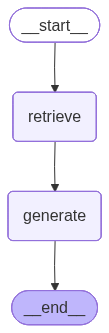

In [32]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [33]:
sequence_graph_builder = StateGraph(AgentState).add_sequence([retrieve, generate])

In [34]:
sequence_graph_builder.add_edge(START, 'retrieve')
sequence_graph_builder.add_edge('generate', END)

In [35]:
sequence_graph = sequence_graph_builder.compile()

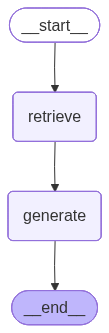

In [36]:
display(Image(sequence_graph.get_graph().draw_mermaid_png()))

In [37]:
initial_state = {'query': query}

graph.invoke(initial_state)

{'query': '연봉 5천만원 직장인의 소득세는?',
 'context': [Document(id='52393066-41c6-4ad4-a248-652cc0d2eb3d', metadata={'source': './documents/income_tax.txt'}, page_content='5년 이하: 30만원 → 납입연수\n5년 초과 10년 이하: 150만원 + 50만원 × (납입연수 - 5년)\n10년 초과 20년 이하: 400만원 + 80만원 × (납입연수 - 10년)\n20년 초과: 1,200만원 + 120만원 × (납입연수 - 20년)\n\n② 직장근로자 초과관세환급금을 분배하여 지급받는 경우 세액의 계산 방법 등 필요한 사항은 대통령령으로 정한다. \n<대통령 2014. 12. 23.>\n<전문개정 2009. 12. 31.>\n제64조(부동산매매업자에 대한 세액 계산의 특례)\n1) 대통령령으로 정하는 부동산매매업(이하 “부동산매매업”이라 한다)을 영위하는 거주자가 이하 “부동산매매업자”라 한다)로서 종합소득세법에 제104조제1항제1호(본항을 포함한다) 및 제103조 또는 같은 조 제7항 각 호의 어느 하나에 해당하는 자산의 매매자익(이하 “주택등매매차익”이라 한다)이 있는 자의 종합소득 산출세액은 다음 각 호의 세액 중 많은 것으로 한다. \n<개정 2014. 12. 23., 2017. 12. 19., 2020. 12. 29.>\n1. 종합소득 산출세액\n\n다음 각 목에 따른 세액의 합계액\n  가. 주택등매매차익에 따른 세율을 적용하여 산출한 세액의 합계액\n  나. 종합소득세법 제55조에 따라 주택등매매차익에 대한 개별세액을 공제한 금액을 과세표준으로 하고 이에 제55조에 따른 세율을 적용하여 산출세액'),
  Document(id='30f6eadd-711f-4da3-ae9b-ed48d1438cef', metadata={'source': './documents/income_tax.txt'}, page_content='5년 이하: 30만원 → 납